# Machine Learning In Julia Language with DecisionTree.jl
##### Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed
##### Decision tree is a flow-chart-like structure
+ Uses Axis -aligned linear decision boundaries to partition or bisect data.
+ Divide and Conquer approach

### Packages and Requirement

###### Julia Packages
+ Pkg.add("DecisionTree")
+ Pkg.add("DataFrames")
+ Pkg.add("Gadfly") 


#### Tree based learning algorithms
+ Uses Both Classification and Regression Tree (CART)
 - DecisionTree
 - RandomForest
+  Gradient Boosting
+ Etc

In [50]:
using DataFrames
using DecisionTree

In [2]:
#Loading the Data
# https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
df = readtable("breastc.csv")

,x1000025,x5,x1,x1_1,x1_2,x2,x1_3,x3,x1_4,x1_5,x2_1
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2
10,1035283,1,1,1,1,1,1,3,1,1,2


In [3]:
typeof(df)

DataFrames.DataFrame

In [4]:
# Adding Column Names to Data
names!(df,
      [:Sample_code_number,      
      :Clump_Thickness,           
      :Cell_Size,    
      :Cell_Shape,   
      :Marginal_Adhesion,         
      :Single_Epithelial_Cell_Size,
      :Bare_Nuclei,               
      :Bland_Chromatin,            
      :Normal_Nucleoli,            
      :Mitoses,
      :Class] )


,Sample_code_number,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2
10,1035283,1,1,1,1,1,1,3,1,1,2


In [26]:
#parse(Int64,df[:Bare_Nuclei])
#stringvec = df[:Bare_Nuclei]

for x in df[:Bare_Nuclei]
    newX = []
    if x !="?"
        x1 = parse(Int64,x)
        push!(newX,x1)
    end
    println(newX)
    print(length(newX))
    
end
print(length(DF))
end


Any[10]
1Any[2]
1Any[4]
1Any[1]
1Any[10]
1Any[10]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[3]
1Any[3]
1Any[9]
1Any[1]
1Any[1]
1Any[1]
1Any[10]
1Any[1]
1Any[10]
1Any[7]
1Any[1]
1Any[]
0Any[1]
1Any[7]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[5]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[10]
1Any[7]
1Any[]
0Any[3]
1Any[10]
1Any[1]
1Any[1]
1Any[1]
1Any[9]
1Any[1]
1Any[1]
1Any[8]
1Any[3]
1Any[4]
1Any[5]
1Any[8]
1Any[8]
1Any[5]
1Any[6]
1Any[1]
1Any[10]
1Any[2]
1Any[3]
1Any[2]
1Any[8]
1Any[2]
1Any[1]
1Any[2]
1Any[1]
1Any[10]
1Any[9]
1Any[1]
1Any[1]
1Any[2]
1Any[1]
1Any[10]
1Any[4]
1Any[2]
1Any[1]
1Any[1]
1Any[3]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[2]
1Any[9]
1Any[4]
1Any[8]
1Any[10]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[1]
1Any[6]
1Any[10]
1Any[5]
1Any[5]
1Any[1]
1Any[3]
1Any[1]
1Any[3]
1Any[10]
1Any[10]
1Any[1]
1Any[9]
1Any[2]
1Any[9]
1Any[10]
1Any[8]
1Any[3]
1Any[5]
1Any[2]
1Any[10]
1Any[3]
1Any[2]
1Any[1]
1Any[2]
1Any[10]
1Any[10]
1

LoadError: [91mUndefVarError: DF not defined[39m

In [27]:
Xfeatures = convert(Array,df[[:Clump_Thickness,           
      :Cell_Size,    
      :Cell_Shape,   
      :Marginal_Adhesion,         
      :Single_Epithelial_Cell_Size,
      :Bare_Nuclei,               
      :Bland_Chromatin,            
      :Normal_Nucleoli,            
      :Mitoses,]])

698×9 Array{Any,2}:
 5   4   4  5  7  "10"   3   2  1
 3   1   1  1  2  "2"    3   1  1
 6   8   8  1  3  "4"    3   7  1
 4   1   1  3  2  "1"    3   1  1
 8  10  10  8  7  "10"   9   7  1
 1   1   1  1  2  "10"   3   1  1
 2   1   2  1  2  "1"    3   1  1
 2   1   1  1  2  "1"    1   1  5
 4   2   1  1  2  "1"    2   1  1
 1   1   1  1  1  "1"    3   1  1
 2   1   1  1  2  "1"    2   1  1
 5   3   3  3  2  "3"    4   4  1
 1   1   1  1  2  "3"    3   1  1
 ⋮                ⋮              
 3   1   1  1  2  "1"    2   3  1
 4   1   1  1  2  "1"    1   1  1
 1   1   1  1  2  "1"    1   1  8
 1   1   1  3  2  "1"    1   1  1
 5  10  10  5  4  "5"    4   4  1
 3   1   1  1  2  "1"    1   1  1
 3   1   1  1  2  "1"    2   1  2
 3   1   1  1  3  "2"    1   1  1
 2   1   1  1  2  "1"    1   1  1
 5  10  10  3  7  "3"    8  10  2
 4   8   6  4  3  "4"   10   6  1
 4   8   8  5  4  "5"   10   4  1

In [ ]:
#Remove One Feature

In [28]:
Xfeatures = convert(Array,df[[:Clump_Thickness,           
      :Cell_Size,    
      :Cell_Shape,   
      :Marginal_Adhesion,         
      :Single_Epithelial_Cell_Size,              
      :Bland_Chromatin,            
      :Normal_Nucleoli,            
      :Mitoses,]])

698×8 Array{Int64,2}:
 5   4   4  5  7   3   2  1
 3   1   1  1  2   3   1  1
 6   8   8  1  3   3   7  1
 4   1   1  3  2   3   1  1
 8  10  10  8  7   9   7  1
 1   1   1  1  2   3   1  1
 2   1   2  1  2   3   1  1
 2   1   1  1  2   1   1  5
 4   2   1  1  2   2   1  1
 1   1   1  1  1   3   1  1
 2   1   1  1  2   2   1  1
 5   3   3  3  2   4   4  1
 1   1   1  1  2   3   1  1
 ⋮                 ⋮       
 3   1   1  1  2   2   3  1
 4   1   1  1  2   1   1  1
 1   1   1  1  2   1   1  8
 1   1   1  3  2   1   1  1
 5  10  10  5  4   4   4  1
 3   1   1  1  2   1   1  1
 3   1   1  1  2   2   1  2
 3   1   1  1  3   1   1  1
 2   1   1  1  2   1   1  1
 5  10  10  3  7   8  10  2
 4   8   6  4  3  10   6  1
 4   8   8  5  4  10   4  1

In [29]:
Ylabel = convert(Array,df[:Class])

698-element Array{Int64,1}:
 2
 2
 2
 2
 4
 2
 2
 2
 2
 2
 2
 4
 2
 ⋮
 2
 2
 2
 2
 4
 2
 2
 2
 2
 4
 4
 4

In [ ]:
using Gadfly


INFO: Recompiling stale cache file C:\Users\Jesiel\.julia\lib\v0.6\StaticArrays.ji for module StaticArrays.
INFO: Recompiling stale cache file C:\Users\Jesiel\.julia\lib\v0.6\DiffResults.ji for module DiffResults.
INFO: Recompiling stale cache file C:\Users\Jesiel\.julia\lib\v0.6\Gadfly.ji for module Gadfly.


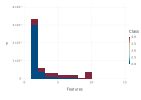

In [31]:
plot(df,x = Xfeatures,
    y = Ylabel,Geom.histogram, 
    color = :Class, 
    Guide.xlabel("Features"))

![title](decisiontree.png)

In [40]:
#using DecisionTree
#Training The classifier
model = build_tree(Ylabel, Xfeatures)

Decision Tree
Leaves: 44
Depth:  11

In [41]:
# prune tree: merge leaves having >= 90% combined purity (default: 100%)
# To avoid overfitting
model = prune_tree(model, 0.9)

Decision Tree
Leaves: 44
Depth:  11

In [42]:
print_tree(model,5)

Feature 2, Threshold 3
L-> Feature 1, Threshold 7
    L-> Feature 7, Threshold 6
        L-> Feature 5, Threshold 6
            L-> Feature 4, Threshold 3
                L-> 2 : 380/380
                R-> 
            R-> Feature 1, Threshold 5
                L-> 2 : 1/1
                R-> 4 : 1/1
        R-> Feature 3, Threshold 3
            L-> 2 : 2/2
            R-> 4 : 3/3
    R-> Feature 6, Threshold 3
        L-> Feature 1, Threshold 10
            L-> 2 : 2/2
            R-> 4 : 1/1
        R-> 4 : 6/6
R-> Feature 2, Threshold 5
    L-> Feature 1, Threshold 7
        L-> Feature 6, Threshold 4
            L-> Feature 3, Threshold 3
                L-> 2 : 16/16
                R-> 
            R-> Feature 4, Threshold 5
                L-> 
                R-> 4 : 8/8
        R-> Feature 1, Threshold 9
            L-> Feature 1, Threshold 8
                L-> 4 : 6/6
                R-> 
            R-> 4 : 20/20
    R-> Feature 1, Threshold 7
        L-> Feature 6, Thres

In [49]:
# Applying Our DecisitionTree To An Unknown Data
apply_tree(model,[3,1,1,1,2 ,3,1,1])

LoadError: [91mMethodError: no method matching apply_tree(::DecisionTree.Ensemble{Int64,Int64}, ::Array{Int64,1})[0m
Closest candidates are:
  apply_tree([91m::DecisionTree.Leaf{S}[39m, ::Array{T,1} where T) where S at C:\Users\Jesiel\.julia\v0.6\DecisionTree\src\classification.jl:185
  apply_tree([91m::DecisionTree.Node{S,T}[39m, ::Array{T,1} where T) where {S, T} at C:\Users\Jesiel\.julia\v0.6\DecisionTree\src\classification.jl:188[39m

### Testing and Cross Validating Accuracy
#### Types of Cross Validation
+ Exhaustive
+ + learn and test in all possible ways to divide sample into training and testing data
+ Non-exhaustive
+ + KFold ==divide the data into K equal subsample folds
+ + Random Subsample,Holdout,LOOV,etc

In [44]:
# run n-fold cross validation for pruned tree,
# using 90% purity threshold pruning, and 3 CV folds
accuracy = nfoldCV_tree(Ylabel, Xfeatures, 0.9, 3)


Fold 

2×2 Array{Int64,2}:
 147   5
   7  73

1
Classes:  [2, 4]
Matrix:   
Accuracy: 0.9482758620689655
Kappa:    0.884844473858372


2×2 Array{Int64,2}:
 150   5
   5  72


Fold 2
Classes:  [2, 4]
Matrix:   
Accuracy: 0.9568965517241379
Kappa:    0.9028068705488059

Fold 3
Classes:  [2, 

2×2 Array{Int64,2}:
 144   5
   9  74

4]
Matrix:   
Accuracy: 0.9396551724137931
Kappa:    0.8672660400490397

Mean Accuracy: 0.9482758620689656


3-element Array{Float64,1}:
 0.948276
 0.956897
 0.939655

#### Using Random Forest Classifer
+ Random forest algorithm is a supervised classification algorithm

In [ ]:
# Train random forest classifier
# using 2 random features, 10 trees, 0.5 portion of samples per tree (optional), and a maximum tree depth of 6 (optional)


In [ ]:
model = build_forest(Ylabel,Xfeatures, 2, 10, 5, 0.7)

Ensemble of Decision Trees
Trees:      10
Avg Leaves: 37.8
Avg Depth:  10.9

In [46]:
# apply learned model
apply_forest(model, [3,1,1,1,4 ,3,1,1])

2

In [47]:
# using 2 random features, 10 trees, 3 folds and 0.5 of samples per tree (optional)
accuracy = nfoldCV_forest(Ylabel, Xfeatures, 2, 10, 3, 0.5)

2×2 Array{Int64,2}:
 141   7
   2  82


Fold 1
Classes:  [2, 4]
Matrix:   
Accuracy: 0.9612068965517241
Kappa:    0.917090216010165

Fold 2
Classes:  [2,

2×2 Array{Int64,2}:
 145   7
   4  76

 4]
Matrix:   
Accuracy: 0.9525862068965517
Kappa:    0.8959895663514835


2×2 Array{Int64,2}:
 151   4
   5  72


Fold 3
Classes:  [2, 4]
Matrix:   
Accuracy: 0.9612068965517241
Kappa:    0.9122394082044384

Mean Accuracy: 0.9583333333333334


3-element Array{Float64,1}:
 0.961207
 0.952586
 0.961207

In [ ]:
# J-Secur1ty @JCharisTech
## Jesus Saves

In [ ]:
# Converting To Arrays of Int64
#parse(Int64,df[:Bare_Nuclei])
function StringConverter(DF::Any)
for x in df[:Bare_Nuclei]
    newX = []
    if x !="?"
        x1 = parse(Int64,x)
        push!(newX,x1) 
    #push!(newX,parse(Int64,x !="?"))
    end
    print(newX)
    print(length(newX))
    
end
print(length(DF))
end